In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL 
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

import pathlib

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
file_loc = "gdrive/My Drive/vehicles_images_new"
##file_loc = "gdrive/My Drive/animal_photos"
test_loc = "gdrive/My Drive/IMAGE_DATASET"

In [36]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(file_loc, validation_split=0.2,subset="training",seed=123,
                                                               image_size= (img_height,img_width),batch_size=batch_size)

Found 4378 files belonging to 4 classes.
Using 3503 files for training.


In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(file_loc,validation_split=0.2,subset="validation",seed=123,
                                                             image_size=(img_height,img_width),batch_size=batch_size)

Found 4378 files belonging to 4 classes.
Using 875 files for validation.


In [38]:
class_names = train_ds.class_names
print(class_names)

['bus', 'motorcycle', 'plane', 'train']


In [39]:
AUTOTUNE =tf.data.AUTOTUNE

In [40]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [41]:
normalization_layer =layers.experimental.preprocessing.Rescaling(1./255)

In [42]:
normalization_ds = train_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalization_ds))

In [43]:
first_image = image_batch[0] 

In [44]:
# Notice the pixels values are now in [0,1] 
print(np.min(first_image),np.max(first_image))

0.0 1.0


In [45]:
num_classes = 4

**MODEL WITH MAXPOOLLING MECHANISM**

* 7 HIDDEN LAYER 
* MAXPOOLING 
* PADDING = SAME
* LOSS FUNCTION = sparse_categorical
* OPTIMIZER = ADAM

In [46]:
model1 = Sequential([layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                    layers.Conv2D(16,3,padding="same",activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding="same",activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding="same",activation="relu"),
                    layers.MaxPooling2D(), 
                    layers.Flatten(),
                    layers.Dense(128,activation="relu"),
                    layers.Dense(num_classes)]) 

In [47]:
model1.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 45, 45, 64)       

In [48]:
tf.keras.layers.Conv2D(filters=4,kernel_size=(5,5),strides=(1,1),padding="valid",data_format=None,dilation_rate=(1,1),groups=1,
                       activation=None,use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros",
                       kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,
                       bias_constraint=None)

In [49]:
%%time
epochs = 15
history= model1.fit(train_ds,validation_data=val_ds,epochs=epochs)

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_accuracy"]
epochs_range =range(epochs)

Epoch 1/15
110/110 [==============================] - 9s 78ms/step - loss: 1.1973 - accuracy: 0.4799 - val_loss: 1.0545 - val_accuracy: 0.5794
Epoch 2/15
110/110 [==============================] - 5s 42ms/step - loss: 0.9794 - accuracy: 0.6032 - val_loss: 1.1279 - val_accuracy: 0.4937
Epoch 3/15
110/110 [==============================] - 4s 41ms/step - loss: 0.8328 - accuracy: 0.6640 - val_loss: 0.9550 - val_accuracy: 0.6331
Epoch 4/15
110/110 [==============================] - 5s 41ms/step - loss: 0.6826 - accuracy: 0.7368 - val_loss: 0.9633 - val_accuracy: 0.6343
Epoch 5/15
110/110 [==============================] - 5s 41ms/step - loss: 0.4888 - accuracy: 0.8162 - val_loss: 1.1844 - val_accuracy: 0.6137
Epoch 6/15
110/110 [==============================] - 5s 41ms/step - loss: 0.3307 - accuracy: 0.8872 - val_loss: 1.2615 - val_accuracy: 0.5989
Epoch 7/15
110/110 [==============================] - 5s 41ms/step - loss: 0.2190 - accuracy: 0.9361 - val_loss: 1.4904 - val_accuracy: 0.5520

**Vidation loss increase after some epoch and validation accuracy decrase, some modification need to be done on the model**

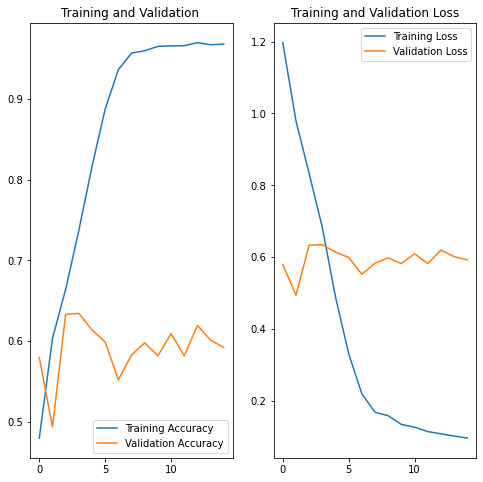

In [50]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation ")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

**MODEL EVALUATE**
* Time requires is 15ms/step

In [51]:
model1.evaluate(val_ds)

28/28 [==============================] - 0s 15ms/step - loss: 1.6386 - accuracy: 0.5920


[1.6386094093322754, 0.5920000076293945]

(32, 180, 180, 3)
(32,)


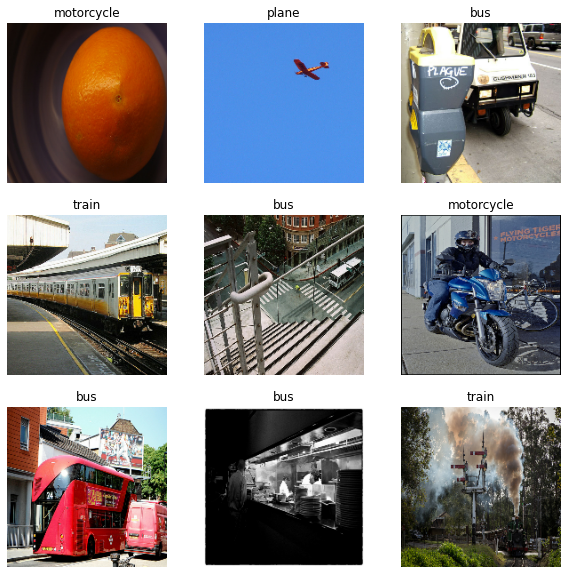

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

**THERE IS OCCURENCE OF OVERFITTING WHEN THE VALIDATION ACCURACY START TO DECREASE, THIS NOTIFY THAT OUR MODEL HAS MEMORIZE SOME OF THE IMAGE, HENCE OVERFITTING OCCURE. DATA AUGEMENTATION IS PROCESS OF SUPPLYING OUR MODEL MORE DATA THROUGH FLIPPING AND ROTATING OF EXISTING DATA TO REDUCE OVERFITTING OF THE MODEL.**

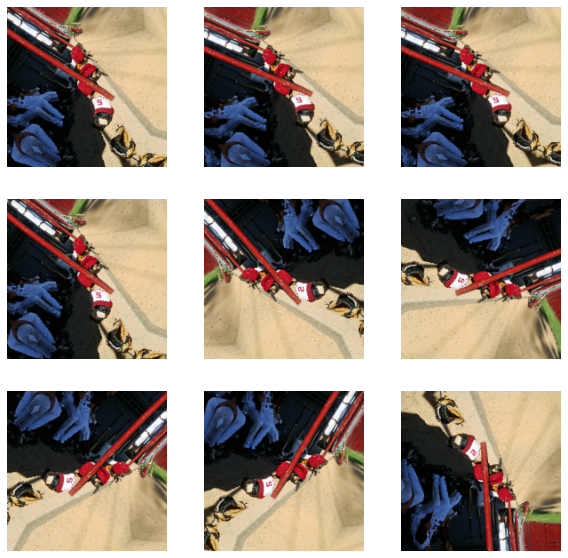

In [53]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                         tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"),
                                         tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)])

for image, _ in train_ds.take(1):
  plt.figure(figsize=(10,10))
  first_image = image[0]
  for i in range(9):
    ax=plt.subplot(3,3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image,0))
    plt.imshow(augmented_image[0]/255)
    plt.axis("off")

**FEEDING THE INPUT WITH DATA THAT IS AUGMENTED TO REDUCE OVERFITTING OF THE MODEL**

In [54]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)


x= layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3))(x)
x = layers.Conv2D(16,3,padding="same",activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(32,3,padding="same",activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64,3,padding="same",activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(128,activation="relu")(x)
layers.Dense(num_classes)
model1 = keras.Model(inputs=inputs, outputs=output) 
model1.compile(loss="SparseCategoricalCrossentropy",optimizer="adam",metrics=["accuracy"])
model1.summary() 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                           

In [55]:
%%time
epochs=15
history = model1.fit(train_ds,validation_data=val_ds,epochs=epochs)

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"] 
val_loss = history.history["val_loss"]

Epoch 1/15
110/110 [==============================] - 6s 49ms/step - loss: 1.4233 - accuracy: 0.3226 - val_loss: 1.3584 - val_accuracy: 0.3611
Epoch 2/15
110/110 [==============================] - 5s 47ms/step - loss: 1.3684 - accuracy: 0.3271 - val_loss: 1.3349 - val_accuracy: 0.3623
Epoch 3/15
110/110 [==============================] - 5s 47ms/step - loss: 1.3903 - accuracy: 0.2329 - val_loss: 1.3822 - val_accuracy: 0.2114
Epoch 4/15
110/110 [==============================] - 5s 47ms/step - loss: 1.3851 - accuracy: 0.2092 - val_loss: 1.3863 - val_accuracy: 0.2114
Epoch 5/15
110/110 [==============================] - 5s 46ms/step - loss: 1.3863 - accuracy: 0.2092 - val_loss: 1.3863 - val_accuracy: 0.2114
Epoch 6/15
110/110 [==============================] - 5s 47ms/step - loss: 1.3863 - accuracy: 0.2141 - val_loss: 1.3863 - val_accuracy: 0.2114
Epoch 7/15
110/110 [==============================] - 5s 48ms/step - loss: 1.3863 - accuracy: 0.2098 - val_loss: 1.3863 - val_accuracy: 0.2114

**MODEL EVALUATION**

In [56]:
model1.evaluate(val_ds) 

28/28 [==============================] - 0s 15ms/step - loss: 1.3863 - accuracy: 0.2114


[1.386297583580017, 0.21142856776714325]

**DATA AUGMENTATION HAS REALLY IMPROVED THE MODEL AND EVALUATION**

**PLOTTING GRAPHS**




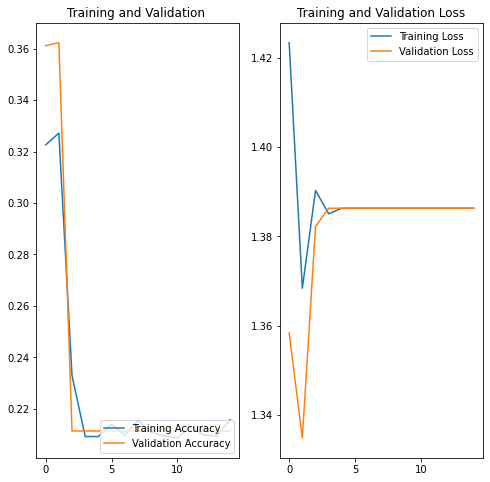

In [57]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation ")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

**TRANSFER LEARNING FROM MOBILEV2**
* PRETRAINED DATA
* Features Extractor

* RESIZING THE IMAGE

In [58]:
img_width = 160
img_height = 160
IMG_SHAPE = (img_width, img_height) + (3,)

In [59]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(file_loc,validation_split=0.2,batch_size=32,image_size=(160,160),
                                                               subset="training",seed=123)

Found 4378 files belonging to 4 classes.
Using 3503 files for training.


In [60]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(file_loc,validation_split=0.2,subset="validation",seed=123,
                                                             batch_size=32,image_size=(160,160))

Found 4378 files belonging to 4 classes.
Using 875 files for validation.


**IMPORTING THE BASE MODEL TO DEPLOY**

In [61]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights="imagenet")

In [62]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [63]:
base_model.trainable = False
base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(4)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [66]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [67]:
inputs = tf.keras.Input(shape=(img_width, img_height, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model2 = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

len(model2.trainable_variables)

initial_epochs = 15

loss0, accuracy0 = model2.evaluate(val_ds)
print('initial loss: {:.2f}'.format(loss0))
print('initial accuracy: {:.2f}'.format(accuracy0))

history2 = model2.fit(train_ds, epochs=initial_epochs, validation_data=val_ds)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, None, None, 3)     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

**Time requires is 126ms/step**

In [68]:
model2.evaluate(val_ds) 

28/28 [==============================] - 5s 126ms/step - loss: 0.5338 - accuracy: 0.8069


[0.5338068604469299, 0.806857168674469]

In [69]:
acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]

loss = history2.history["loss"]
val_loss = history2.history["val_loss"]

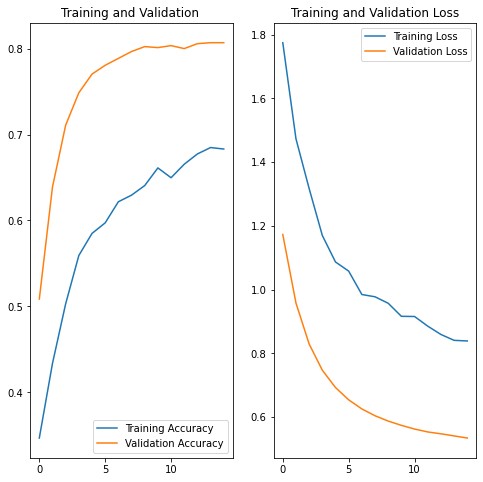

In [70]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation ")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

**FINE TUNNING THE PRE-TRAINED MODEL FROM MOBILENETV2**

In [71]:
base_model.trainable = True
base_model.summary()

print('Number of layers in the base model: ',len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [72]:
base_learning_rate = 0.0001
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 

In [73]:
%%time
initial_epochs = 15
fine_tune_epochs = 15
total_epochs = initial_epochs + fine_tune_epochs
history_fine = model2.fit(train_ds, epochs=total_epochs, 
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds) 

Epoch 15/30
110/110 [==============================] - 35s 252ms/step - loss: 0.8180 - accuracy: 0.6806 - val_loss: 0.5293 - val_accuracy: 0.8114
Epoch 16/30
110/110 [==============================] - 24s 213ms/step - loss: 0.7501 - accuracy: 0.7057 - val_loss: 0.5111 - val_accuracy: 0.8091
Epoch 17/30
110/110 [==============================] - 24s 206ms/step - loss: 0.6930 - accuracy: 0.7294 - val_loss: 0.4890 - val_accuracy: 0.8229
Epoch 18/30
110/110 [==============================] - 25s 214ms/step - loss: 0.6677 - accuracy: 0.7431 - val_loss: 0.4813 - val_accuracy: 0.8183
Epoch 19/30
110/110 [==============================] - 25s 217ms/step - loss: 0.6263 - accuracy: 0.7559 - val_loss: 0.4815 - val_accuracy: 0.8274
Epoch 20/30
110/110 [==============================] - 25s 217ms/step - loss: 0.6124 - accuracy: 0.7534 - val_loss: 0.4752 - val_accuracy: 0.8229
Epoch 21/30
110/110 [==============================] - 25s 216ms/step - loss: 0.5981 - accuracy: 0.7551 - val_loss: 0.4838 -

In [74]:
model2.evaluate(val_ds) 

28/28 [==============================] - 5s 131ms/step - loss: 0.4767 - accuracy: 0.8297


[0.4766826629638672, 0.829714298248291]

**PLOTTING GRAPH FOR THE FINE TUNE MODEL OF PRE-TRAINED MODEL**

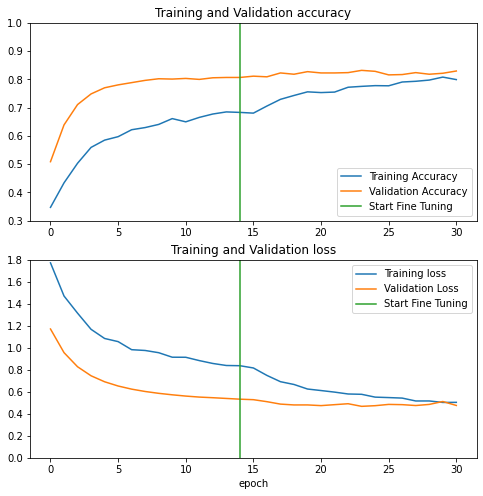

In [75]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim(0.3, 1)
plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim(0, 1.8)
plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.xlabel('epoch')
plt.show()

**NOW ITS TIME TO SAVE THE MODEL AS I AM SATISFIED WITH THE EVALUATION**

In [76]:
model2.save('gdrive/My Drive/computer-vision', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [77]:
computer_vision_model = keras.models.load_model('gdrive/My Drive/computer-vision')

In [78]:
computer_vision_model.evaluate(train_ds)

110/110 [==============================] - 19s 158ms/step - loss: 0.3734 - accuracy: 0.8635


[0.3733740448951721, 0.8635455369949341]

In [79]:
computer_vision_model.evaluate(val_ds)

28/28 [==============================] - 5s 132ms/step - loss: 0.4767 - accuracy: 0.8297


[0.47668275237083435, 0.829714298248291]

**IMPORTING MY TEST DATA TO VERIFY MY MODEL ACCURACY**

In [80]:
batch_size  = 32
img_height = 160
img_width = 160

test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_loc, validation_split=None,seed=123,batch_size=32,
                                                              image_size=(img_height,img_width))

Found 20 files belonging to 4 classes.


In [81]:
test_ds.class_names

['BUS', 'MOTOR-BIKE', 'PLANE', 'TRAIN']

**EVALUATING MY MODEL WITH THE TEST DATA**

In [82]:
computer_vision_model.evaluate(test_ds)

1/1 [==============================] - 4s 4s/step - loss: 0.6360 - accuracy: 0.8000


[0.6359878778457642, 0.800000011920929]

In [83]:
import cv2 as cv
from keras.preprocessing import image

In [84]:
def prepareImage(file_path):
    img_array = cv.imread(file_path)
    new_array = cv.resize(img_array, (img_width, img_height))
    return new_array.reshape(-1, img_width, img_height, 3, 1)

In [85]:
def predict_images(file_paths):
    test_classes = test_ds.class_names
    for path in test_ds.file_paths:
        highest_val_index = np.argmax(computer_vision_model.predict(prepareImage(path))[0])
    test_classes = test_ds.class_names
    fig = plt.figure(figsize=(10, 10))
    for i, path in enumerate(test_ds.file_paths):
        highest_val_index = np.argmax(computer_vision_model.predict(prepareImage(path))[0])
        label=test_classes[highest_val_index]
        img = image.load_img(path, target_size=(img_width,img_height))
        fig.add_subplot(4,5, i+1)
        plt.title(label)
        plt.yticks(color='w')
        plt.xticks(color='w')
        plt.imshow(img)

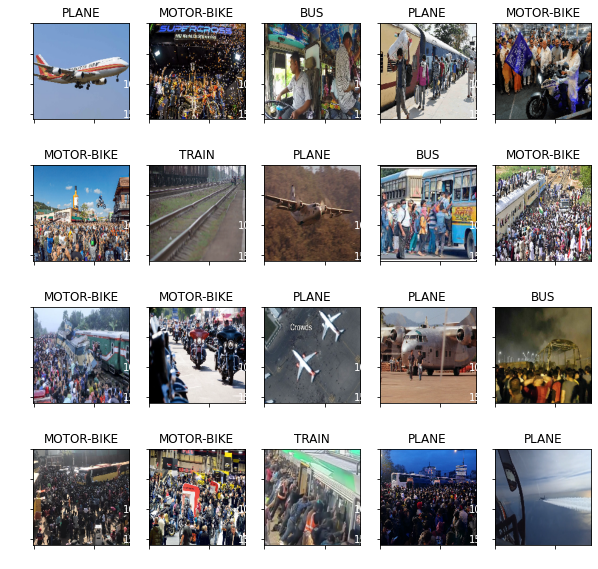

In [86]:
predict_images(test_ds.file_paths)
